**Prática de Segmentação de imagens**

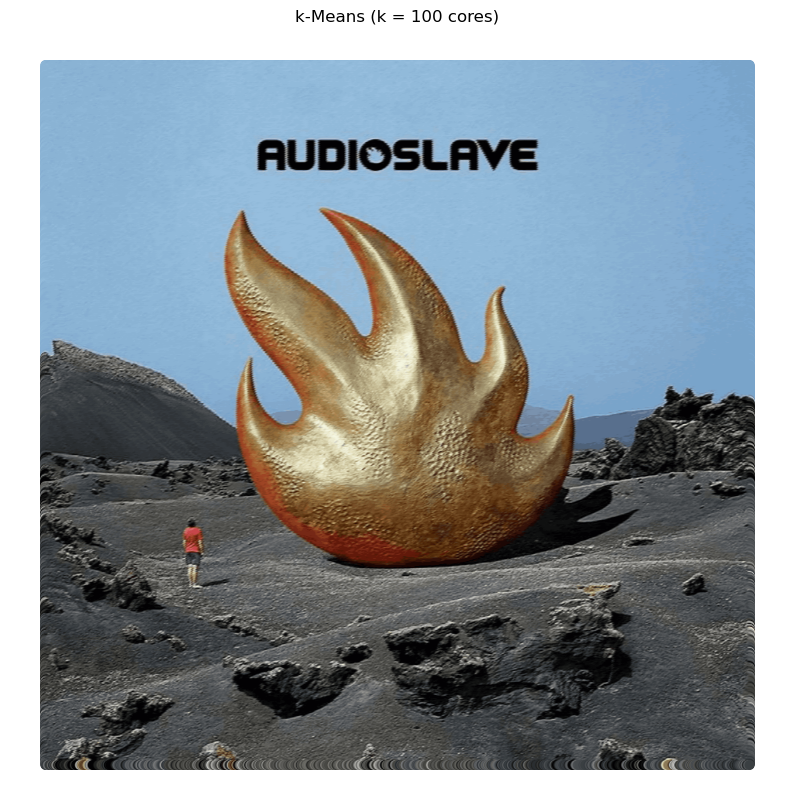

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

# A função recebe o endereço de um arquivo .jpg e o converte em uma matriz de três dimensões contendo a localização do pixel e suas intensidades RGB.
imagem = mpimg.imread("Audioslave_Album.jpg")
K = 100

def quantization(k, imagem):
# Em seguida convertemos uma série de informações contidas na matriz acima em um objeto data frame compatível com as funções de agrupamento do Python.
    imagemRGB = pd.DataFrame({
        'x': np.repeat(np.arange(1, imagem.shape[1] + 1), imagem.shape[0]),
        'y': np.tile(np.arange(imagem.shape[0], 0, -1), imagem.shape[1]),
        'R': imagem[:, :, 0].flatten(),
        'G': imagem[:, :, 1].flatten(),
        'B': imagem[:, :, 2].flatten()
    })
# Essa chamada de função toma como parâmetros as três colunas de imagemRGB referentes às cores, a quantidade de agrupamentos e por consequência
# de cores da nova imagem, e a quantidade máxima de iterações para interromper a função caso a taxa de variação geral não se estabilize.
    kmeans = KMeans(n_clusters=k, max_iter=30)
    kmeans.fit(imagemRGB[['R', 'G', 'B']])

# A linha abaixo adiciona localmente (sem alterar o objeto original) uma coluna de cores em hexadecimal obtidas a partir das cores RGB.
    imagemRGB['kColours'] = ['#%02x%02x%02x' % (int(r), int(g), int(b)) for r, g, b in kmeans.cluster_centers_[kmeans.labels_]]

# Retornamos a imagem para ser apresentada no gráfico
    return imagemRGB

imagemRGB = quantization(K, imagem)

# Estas linhas especificam que estamos construindo uma imagem e colorindo os pixels usando os valores em hexadecimal da coluna kColours.
plt.figure(figsize=(10, 10))
plt.scatter(imagemRGB['y'], imagemRGB['x'], color=imagemRGB['kColours'])
plt.title(f"k-Means (k = {K} cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.show()



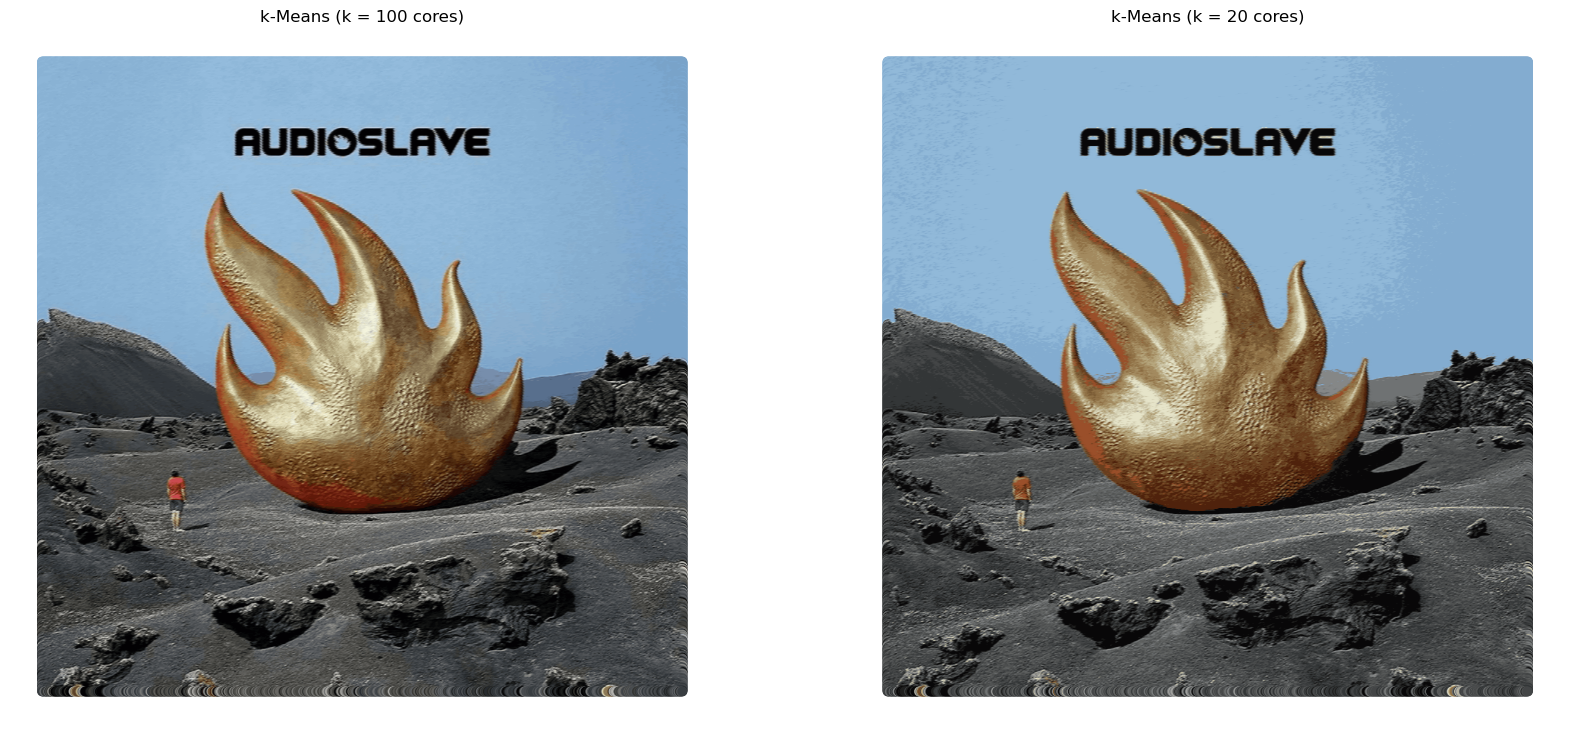

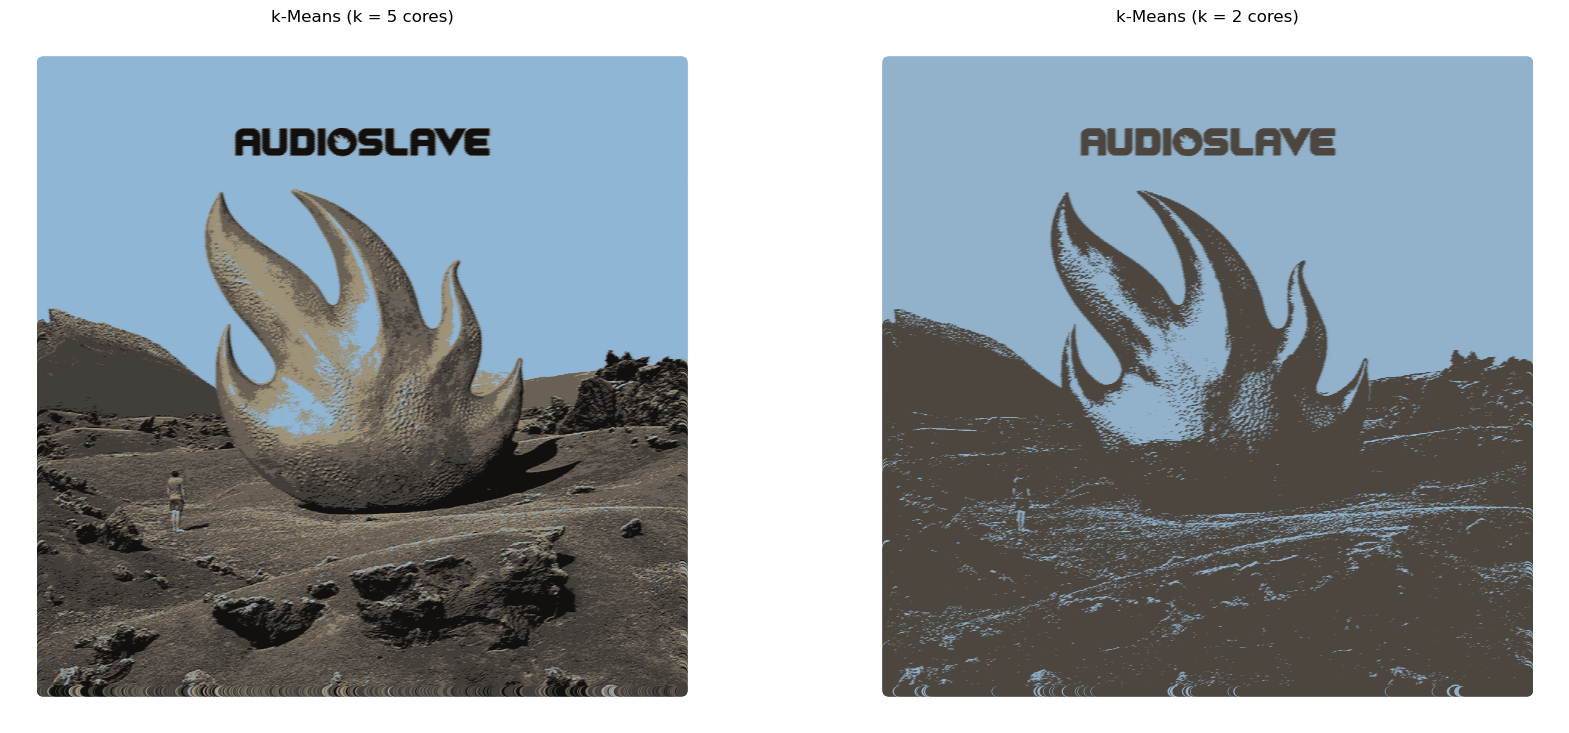

In [22]:
imagem100 = quantization(100, imagem)
imagem20 = quantization(20, imagem)
imagem5 = quantization(5, imagem)
imagem2 = quantization(2, imagem)


plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
plt.scatter(imagem100['y'], imagem100['x'], color=imagem100['kColours'])
plt.title(f"k-Means (k = 100 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.subplot(1,2,2)
plt.scatter(imagem20['y'], imagem20['x'], color=imagem20['kColours'])
plt.title(f"k-Means (k = 20 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.show()

#===================================================

plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
plt.scatter(imagem5['y'], imagem5['x'], color=imagem5['kColours'])
plt.title(f"k-Means (k = 5 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.subplot(1,2,2)
plt.scatter(imagem2['y'], imagem2['x'], color=imagem2['kColours'])
plt.title(f"k-Means (k = 2 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.show()


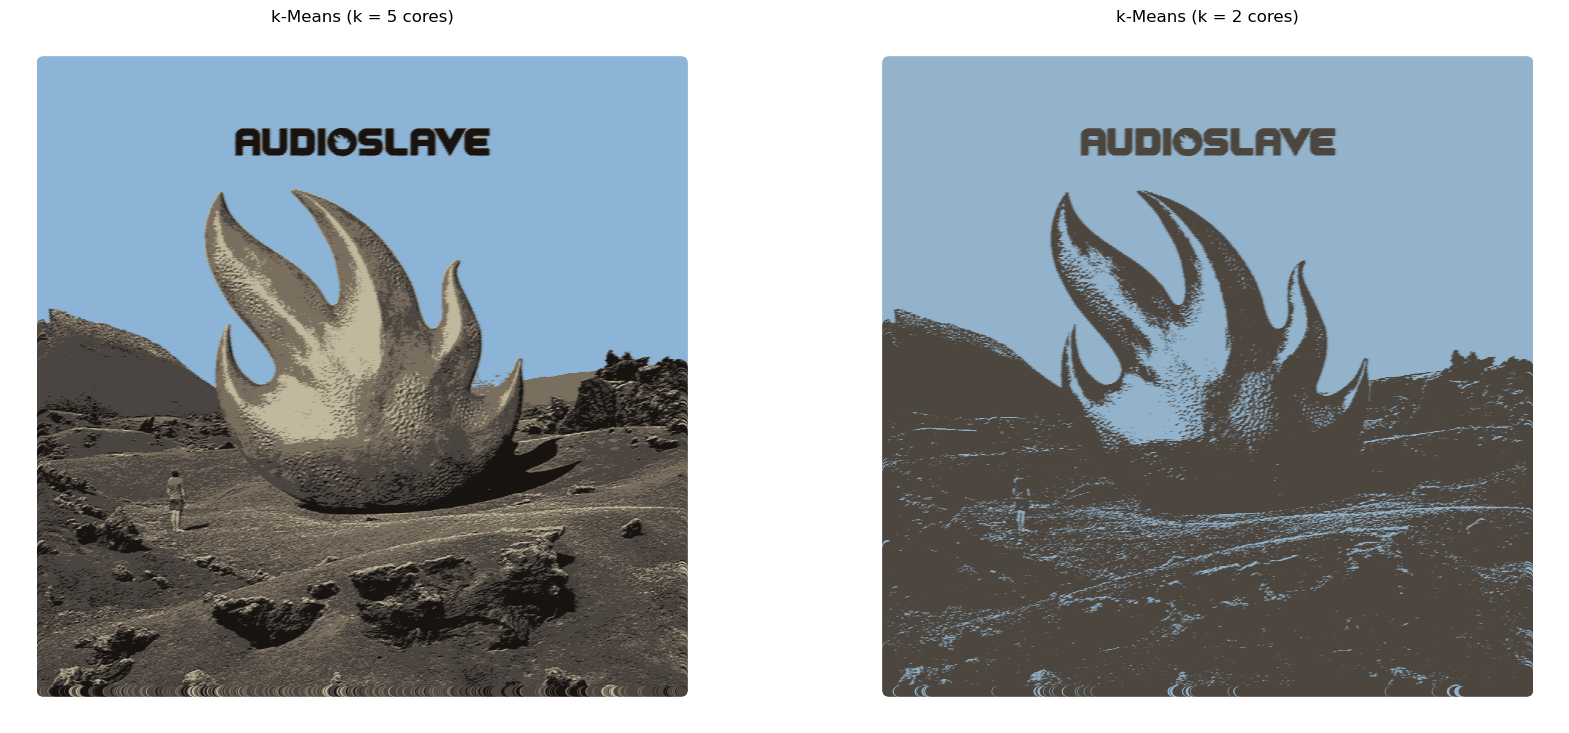

In [25]:
def quantization2(k, imagem):
# Em seguida convertemos uma série de informações contidas na matriz acima em um objeto data frame compatível com as funções de agrupamento do Python.
    imagemRGB = pd.DataFrame({
        'x': np.repeat(np.arange(1, imagem.shape[1] + 1), imagem.shape[0]),
        'y': np.tile(np.arange(imagem.shape[0], 0, -1), imagem.shape[1]),
        'R': imagem[:, :, 0].flatten(),
        'G': imagem[:, :, 1].flatten(),
        'B': imagem[:, :, 2].flatten()
    })
# Essa chamada de função toma como parâmetros as três colunas de imagemRGB referentes às cores, a quantidade de agrupamentos e por consequência
# de cores da nova imagem, e a quantidade máxima de iterações para interromper a função caso a taxa de variação geral não se estabilize.
    kmeans = KMeans(n_clusters=k, max_iter=500, init='random', n_init=15)
    kmeans.fit(imagemRGB[['R', 'G', 'B']])

# A linha abaixo adiciona localmente (sem alterar o objeto original) uma coluna de cores em hexadecimal obtidas a partir das cores RGB.
    imagemRGB['kColours'] = ['#%02x%02x%02x' % (int(r), int(g), int(b)) for r, g, b in kmeans.cluster_centers_[kmeans.labels_]]

# Retornamos a imagem para ser apresentada no gráfico
    return imagemRGB

imagem100 = quantization2(100, imagem)
imagem20 = quantization2(20, imagem)
imagem5 = quantization2(5, imagem)
imagem2 = quantization2(2, imagem)


plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
plt.scatter(imagem100['y'], imagem100['x'], color=imagem100['kColours'])
plt.title(f"k-Means (k = 100 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.subplot(1,2,2)
plt.scatter(imagem20['y'], imagem20['x'], color=imagem20['kColours'])
plt.title(f"k-Means (k = 20 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.show()

#===================================================

plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
plt.scatter(imagem5['y'], imagem5['x'], color=imagem5['kColours'])
plt.title(f"k-Means (k = 5 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.subplot(1,2,2)
plt.scatter(imagem2['y'], imagem2['x'], color=imagem2['kColours'])
plt.title(f"k-Means (k = 2 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.show()

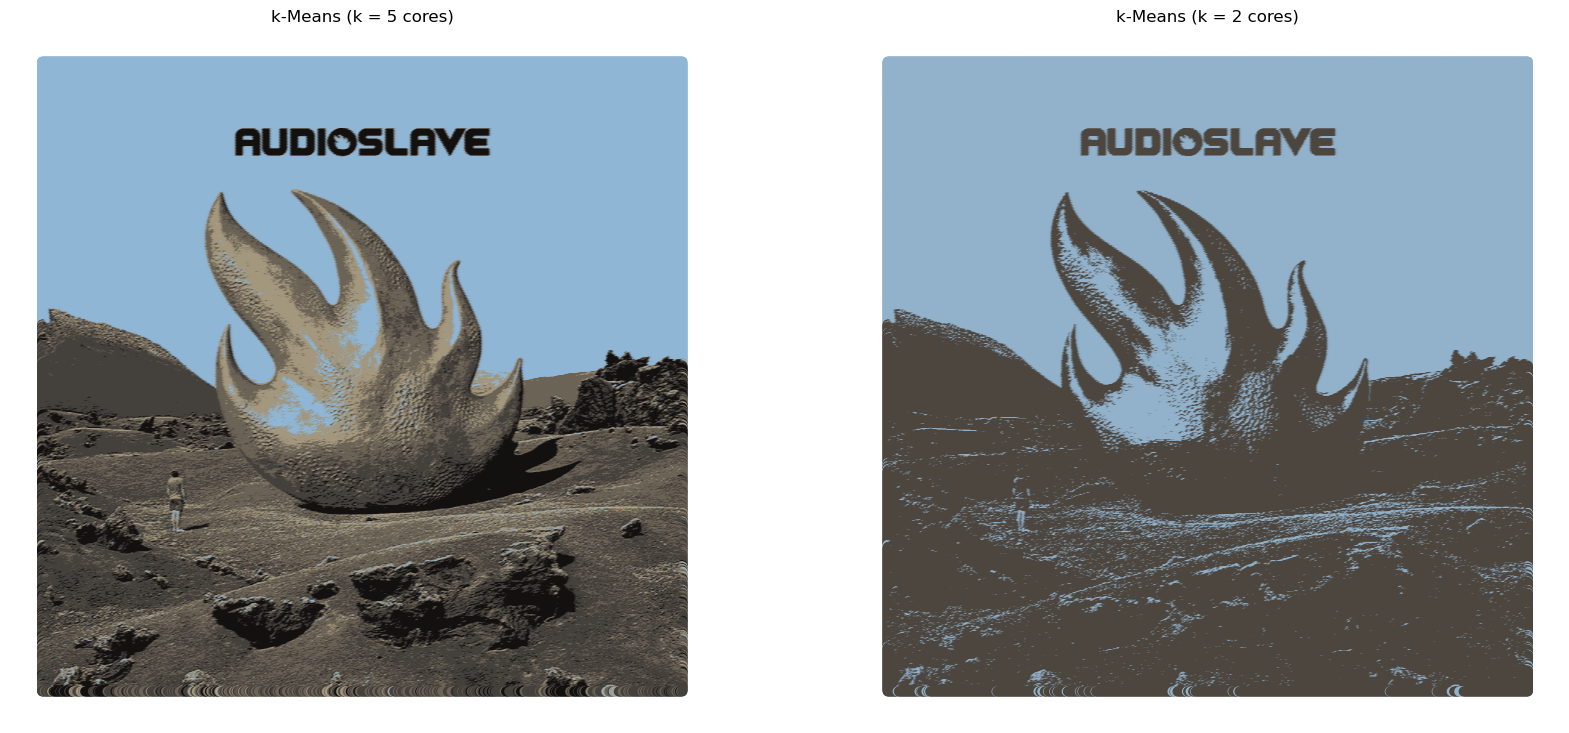

In [24]:
def quantization3(k, imagem):
# Em seguida convertemos uma série de informações contidas na matriz acima em um objeto data frame compatível com as funções de agrupamento do Python.
    imagemRGB = pd.DataFrame({
        'x': np.repeat(np.arange(1, imagem.shape[1] + 1), imagem.shape[0]),
        'y': np.tile(np.arange(imagem.shape[0], 0, -1), imagem.shape[1]),
        'R': imagem[:, :, 0].flatten(),
        'G': imagem[:, :, 1].flatten(),
        'B': imagem[:, :, 2].flatten()
    })
# Essa chamada de função toma como parâmetros as três colunas de imagemRGB referentes às cores, a quantidade de agrupamentos e por consequência
# de cores da nova imagem, e a quantidade máxima de iterações para interromper a função caso a taxa de variação geral não se estabilize.
    kmeans = KMeans(n_clusters=k, max_iter=500, algorithm='elkan' )
    kmeans.fit(imagemRGB[['R', 'G', 'B']])

# A linha abaixo adiciona localmente (sem alterar o objeto original) uma coluna de cores em hexadecimal obtidas a partir das cores RGB.
    imagemRGB['kColours'] = ['#%02x%02x%02x' % (int(r), int(g), int(b)) for r, g, b in kmeans.cluster_centers_[kmeans.labels_]]

# Retornamos a imagem para ser apresentada no gráfico
    return imagemRGB

imagem100 = quantization3(100, imagem)
imagem20 = quantization3(20, imagem)
imagem5 = quantization3(5, imagem)
imagem2 = quantization3(2, imagem)


plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
plt.scatter(imagem100['y'], imagem100['x'], color=imagem100['kColours'])
plt.title(f"k-Means (k = 100 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.subplot(1,2,2)
plt.scatter(imagem20['y'], imagem20['x'], color=imagem20['kColours'])
plt.title(f"k-Means (k = 20 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.show()

#===================================================

plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
plt.scatter(imagem5['y'], imagem5['x'], color=imagem5['kColours'])
plt.title(f"k-Means (k = 5 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.subplot(1,2,2)
plt.scatter(imagem2['y'], imagem2['x'], color=imagem2['kColours'])
plt.title(f"k-Means (k = 2 cores)")
plt.gca().invert_xaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.gca().invert_yaxis()  # Invertendo o eixo x para corresponder à imagem original
plt.axis('off')  # Desligando os eixos
plt.show()